In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import os
os.environ['LIBROSA_DATA_DIR'] = "/Users/syedhussain/Documents/Librosa/audio"
import librosa

In [2]:
x_1, fs = librosa.load("/Users/syedhussain/Documents/Librosa/audio/Ludwig_van_Beethoven_-_Symphonie_5_c-moll_-_1._Allegro_con_brio.ogg")
# And a second version
x_2, fs = librosa.load("/Users/syedhussain/Documents/Librosa/audio/Ludwig_van_Beethoven_-_Symphonie_5_c-moll_-_1._Allegro_con_brio.ogg")

## Load Audio Recordings
First, let's load a first version of our audio recordings.



[Text(0.5, 1.0, 'Version $X_2$')]

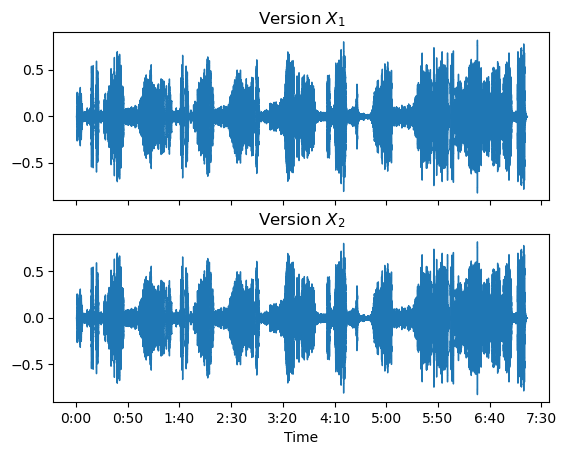

In [3]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.waveshow(x_1, sr=fs, ax=ax[0])
ax[0].set(title='Version $X_1$')
ax[0].label_outer()

librosa.display.waveshow(x_2, sr=fs, ax=ax[1])
ax[1].set(title='Version $X_2$')

## Extract Chroma Features



In [4]:
hop_length = 1024

x_1_chroma = librosa.feature.chroma_cqt(y=x_1, sr=fs,
                                         hop_length=hop_length)
x_2_chroma = librosa.feature.chroma_cqt(y=x_2, sr=fs,
                                         hop_length=hop_length)



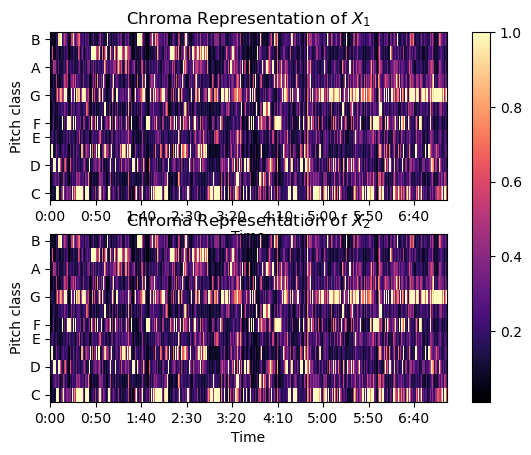

In [5]:
fig, ax = plt.subplots(nrows=2, sharey=True)
img = librosa.display.specshow(x_1_chroma, x_axis='time',
                               y_axis='chroma',
                               hop_length=hop_length, ax=ax[0])
ax[0].set(title='Chroma Representation of $X_1$')
librosa.display.specshow(x_2_chroma, x_axis='time',
                         y_axis='chroma',
                         hop_length=hop_length, ax=ax[1])
ax[1].set(title='Chroma Representation of $X_2$')
fig.colorbar(img, ax=ax)

## Align Chroma Sequences



In [6]:
D, wp = librosa.sequence.dtw(X=x_1_chroma, Y=x_2_chroma, metric='cosine')
wp_s = librosa.frames_to_time(wp, sr=fs, hop_length=hop_length)


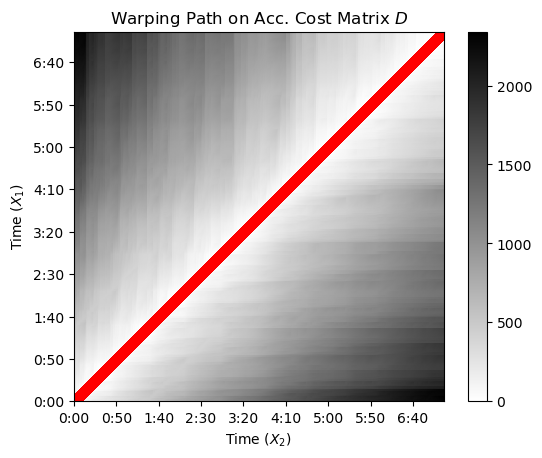

In [7]:

fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='time', sr=fs,
                               cmap='gray_r', hop_length=hop_length, ax=ax)
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
ax.set(title='Warping Path on Acc. Cost Matrix $D$',
       xlabel='Time $(X_2)$', ylabel='Time $(X_1)$')
fig.colorbar(img, ax=ax)

## Alternative Visualization in the Time Domain

We can also visualize the warping path directly on our time domain signals.
Red lines connect corresponding time positions in the input signals.
(Thanks to F. Zalkow for the nice visualization.)



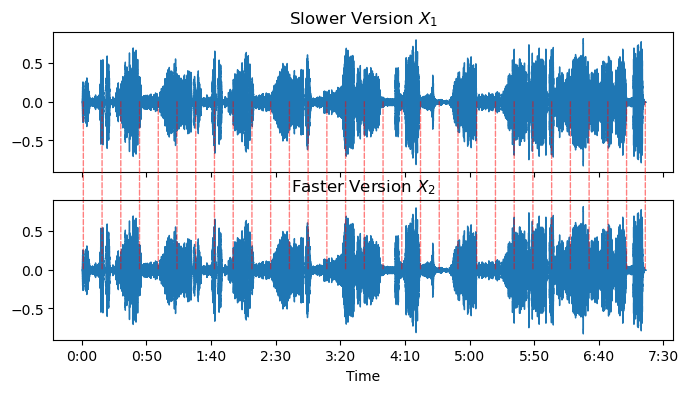

In [8]:
from matplotlib.patches import ConnectionPatch

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(8,4))

# Plot x_2
librosa.display.waveshow(x_2, sr=fs, ax=ax2)
ax2.set(title='Faster Version $X_2$')

# Plot x_1
librosa.display.waveshow(x_1, sr=fs, ax=ax1)
ax1.set(title='Slower Version $X_1$')
ax1.label_outer()


n_arrows = 30
for tp1, tp2 in wp_s[::len(wp_s)//n_arrows]:
    # Create a connection patch between the aligned time points
    # in each subplot
    con = ConnectionPatch(xyA=(tp1, 0), xyB=(tp2, 0),
                          axesA=ax1, axesB=ax2,
                          coordsA='data', coordsB='data',
                          color='r', linestyle='--',
                          alpha=0.5)
    con.set_in_layout(False)  # This is needed to preserve layout
    ax2.add_artist(con)

In [9]:
# Calculate the match percentage
# Here, we invert the distance to get a similarity measure and then scale it to get a percentage
max_dist = max(x_1_chroma.shape[1], x_2_chroma.shape[1])  # Maximum possible distance
match_percentage = (1 - D / max_dist) * 100

In [10]:
np.mean(match_percentage)

92.30182424965636

In [11]:
print(f"Match Percentage: {match_percentage}%")

Match Percentage: [[100.          99.99962039  99.99845824 ...  75.45861723  75.45727341
   75.45584855]
 [ 99.99962039 100.          99.99973268 ...  75.45784647  75.45652749
   75.45521238]
 [ 99.99845824  99.99973268 100.         ...  75.45642849  75.45512027
   75.45389778]
 ...
 [ 75.45861723  75.45784647  75.45642849 ... 100.          99.99996942
   99.99983888]
 [ 75.45727341  75.45652749  75.45512027 ...  99.99996942 100.
   99.99987751]
 [ 75.45584855  75.45521238  75.45389778 ...  99.99983888  99.99987751
  100.        ]]%


In [12]:
max_dist

9389

In [13]:
from flask import Flask
app = Flask(__name__)

@app.route("/")
def hello():
    return np.mean(match_percentage)